Use any additional libraries you want, but if you don't explicitly code stuff that I have explicitly asked you to code, you will not get marks.

### Q1. Kernel k-means

Let's try and end our course on a happy note. The smiley dataset you see below is made up of many clusters of points. 

In [ ]:
import numpy as np
import numpy.linalg as lin
import numpy.random as rnd
from matplotlib import pyplot as plt

#Edit
import pandas as pd
import sys


def getFigure( sizex = 7, sizey = 7 ):
    fig = plt.figure( figsize = (sizex, sizey) )
    return fig

def plot2D( X, fig, color = 'r', marker = '+', size = 100, empty = False ):
    plt.figure( fig.number )
    if empty:
        plt.scatter( X[:,0], X[:,1], s = size, facecolors = 'none', edgecolors = color, marker = marker  )
    else:
        plt.scatter( X[:,0], X[:,1], s = size, c = color, marker = marker )


def genCrescentData( d, n, mu, r, flipped = False ):
    X = np.vstack( (np.cos( np.linspace( 0, np.pi, n ) ), np.sin( np.linspace( 0, np.pi, n ) ) ) ).T
    if flipped:
        X[:,1] = -np.abs( X[:,1] )
    else:
        X[:,1] = np.abs( X[:,1] )
    X = (X * r) + mu
    return X

def genSphericalData( d, n, mu, r ):
    X = rnd.normal( 0, 1, (n, d) )
    norms = lin.norm( X, axis = 1 )
    X = X / norms[:, np.newaxis]
    X = (X * r) + mu
    return X

In [ ]:
d = 2
n = 200

mu1 = np.array( [0,0] )
mu2 = np.array( [0,1] )
mu3 = np.array( [0,0] )
mu4 = np.array( [-3,5] )
mu5 = np.array( [3,5] )

tmp1 = genCrescentData( d, n, mu1, 1 )
tmp2 = genCrescentData( d, n, mu2, 5, flipped = True )
tmp3 = genSphericalData( d, n, mu3, 10 )
tmp4 = genSphericalData( d, n, mu4, 1 )
tmp5 = genSphericalData( d, n, mu5, 1 )
X = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5) )

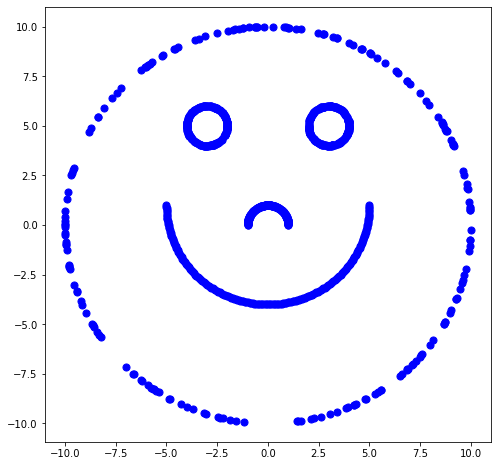

In [ ]:
fig = getFigure( 8, 8 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

(a) Can you implement the k-means algorithm to cluster this dataset? Visualize your output. [10 points] 

(b) Implement k-means++ to initialize cluster centers usefully. [5 points]

(c) What value of k gives you the best clustering? Are you happy with the quality of the clustering? [5 points]


(d) I'm going to say that we want to be able to do better than this. So I want you to kernelize your k-means algorithm with a Gaussian kernel. Visualize the clustering output of your kernel k-means algorithm [15 points]

In [ ]:
# SOLUTION 1

In [ ]:
# pre-processing data
def preprocess_data(X) :
  feat1 = []
  feat2  = []
  for i in range(len(X)) :
    feat1.append(X[i][0])
    feat2.append(X[i][1])
  data = {'feat1' : feat1,'feat2' : feat2}
  data = pd.DataFrame(data)
  return data

In [ ]:
def k_means_algo(k_means,k_means2,clusters,data) :    
  while not k_means2.equals(k_means):
    cluster_count = 0
    for idx, k_mean in k_means.iterrows():
      clusters[cluster_count] = (data[k_means.columns] - 
                                np.array(k_mean)).pow(2).sum(1).pow(0.5)
      cluster_count += 1

    data['MDCluster'] = clusters.idxmin(axis=1)
    k_means2 = k_means
    k_means = pd.DataFrame()
    k_means_frame = data.groupby('MDCluster').agg(np.mean)

    k_means[k_means_frame.columns] =  k_means_frame[k_means_frame.columns]
  return (data,k_means)

In [ ]:
# RANDOMLY INITIALIZING K AS 5
k=5
color=['red','green','blue','cyan','magenta','yellow','black','orange','darkgreen','olive']

def plot_data(data,k_means) :
  for i in range(k):
    plt.scatter(x=data['feat1'],y=data['feat2'].where(data['MDCluster'] == i),c=color[i])
    
  plt.scatter(x=k_means['feat1'],y=k_means['feat2'],marker='.')
  plt.show()

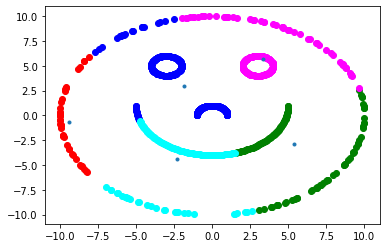

In [ ]:
data = preprocess_data(X)
centers = (data.sample(k, replace=False))
k_means2 = pd.DataFrame()
clusters = pd.DataFrame() 
processed_data,new_centers = k_means_algo(centers,k_means2,clusters,data)
plot_data(processed_data,new_centers)

In [ ]:
# Implementing K++ algo

def distance(p1, p2):
    return np.sum((p1 - p2)**2)
  
# initialization algorithm
def kpp(data, k):
  centroids = []
  centroids.append(data[np.random.randint(
    data.shape[0]), :])
  
  for c_id in range(k - 1):

    dist = []
    for i in range(data.shape[0]):
      point = data[i, :]
      d = sys.maxsize
      for j in range(len(centroids)):
        temp_dist = distance(point, centroids[j])
        d = min(d, temp_dist)
      dist.append(d)
             
    dist = np.array(dist)
    next_centroid = data[np.argmax(dist), :]
    centroids.append(next_centroid)
    dist = []
        
  feat1 = []
  feat2 = []
  for i in range(len(centroids)) :
    feat1.append(centroids[i][0])
    feat2.append(centroids[i][1])
  data = {'feat1' : feat1,'feat2' : feat2}
  df = pd.DataFrame(data)
  return df

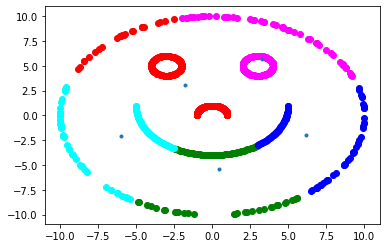

In [ ]:
data = preprocess_data(X)
centers =  kpp(X, k = 5) 
k_means2 = pd.DataFrame()
clusters = pd.DataFrame() 
processed_data,new_centers = k_means_algo(centers,k_means2,clusters,data)
plot_data(processed_data,new_centers)

In [ ]:
# FOR BEST K VALUE : SILHOUTTE PROCESSING
def process_data(data) :
  labels = data['MDCluster']
  x = []
  for i in range(len(data)) :
    temp_data = [data['feat1'][i],data['feat2'][i]]
    x.append(temp_data)
  x = np.array(x)
  return (x,labels)

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

for k in range(2, kmax+1):
  data = preprocess_data(X)
  k_means =  kpp(X, k )
  k_means2 = pd.DataFrame()
  clusters = pd.DataFrame() 
  data,_ = k_means_algo(k_means,k_means2,clusters,data)
  x,labels = process_data(data)
  sil.append(silhouette_score(x, labels, metric = 'euclidean'))

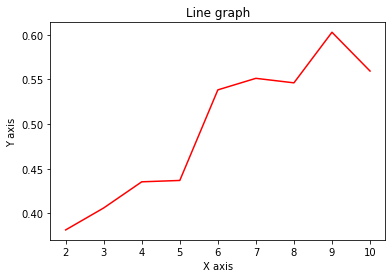

In [ ]:
# PLOTTING
x = [x for x in range(2,11)]
y = np.array(sil)

plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="red")
plt.show()

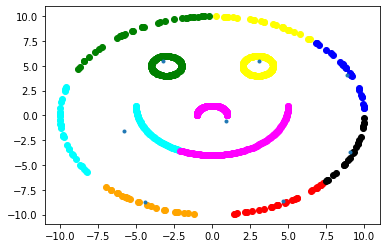

In [ ]:
# FOR BEST CLUSTERING 
k=8
data = preprocess_data(X)
centers =  kpp(X, k = 8)
k_means2 = pd.DataFrame()
clusters = pd.DataFrame() 
processed_data,new_centers = k_means_algo(centers,k_means2,clusters,data)
plot_data(processed_data,new_centers)

In [ ]:
'''
Steps for Kernel k-means clustering:    
Let  X = {a1, a2, a3, ..., an} be the set of data points and 'c' be the number of clusters.

1) Randomly initialize ‘c’ cluster center. [Implementation similar to above]

2) Compute the distance of each data point and the cluster center in the transformed space by "kernelized versions".

3) Assign data point to that cluster center whose distance is minimum.

4) Until data points are re-assigned repeat from step 2).

'''

"\nSteps for Kernel k-means clustering:    \nLet  X = {a1, a2, a3, ..., an} be the set of data points and 'c' be the number of clusters.\n\n1) Randomly initialize ‘c’ cluster center.\n\n2) Compute the distance of each data point and the cluster center in the transformed space by kernelized versions.\n\n3) Assign data point to that cluster center whose distance is minimum.\n\n4) Until data points are re-assigned repeat from step 2).\n\n"

### Q2. Expectation-Maximization

We saw how to use EM to learn parameters for Gaussian mixture models last week. Specifically, for a GMM described by the set of parameters $\{\pi_k, \mu_k, \Sigma_k \}_{k=1}^K$, we saw that the E-step boils down to figuring out the expected assignment of clusters based on a responsibility judgment proportional to $\pi_k~N(\mu_k, \Sigma_k)$, given curent parameter estimates, followed by using GDA MLE updates assuming the current expected assignment in the M-step to update parameter values.

(a) Can you derive the E-step and M-step for an EM algorithm that would work for a Gaussian mixture model wherein the mixture weights $\pi_k$ are known, and the covariances are restricted to be spherical, i.e. $\Sigma_k = \sigma^2_k I$? [20 points]

(b) Implement this algorithm and show that it works on synthetic data with 3 clusters. If you are unable to derive the EM algorithm for part (a), implement the EM algorithm I showed in the class slides for the standard GMM (5 point penalty for taking this option) [15 points]. 

In [ ]:
# SOLUTION 2

# 2(a)
The density $p(\textbf{x})$ of a Gaussian mixture distribution:
$$p(\textbf{x})=\sum^{K}_{k=1} \pi_k \mathcal{N}(\textbf{x}|\mu_k,Σ_k)$$
for $\textbf{x} \in \mathbb{R}^D$. So

$$\gamma_k(\textbf{x}) = \frac{\pi_k \mathcal{N}(\textbf{x}|\mu_k,Σ_k)}{\sum^{K}_{j=1} \pi_j \mathcal{N}(\textbf{x}|\mu_j,Σ_j)}$$

This expresses the posterior probability $p(k|\textbf{x})$.

The maximum likelihood estimate for the parameters of each component $k=1,\dots,K$ is
$$\pi_k = \frac{N_k}{N}$$
$$\mu_k = \frac{1}{N_k} \sum^{N}_{n=1} \gamma_{nk} \textbf{x}_n$$
$$Σ_k = \frac{1}{N_k} \sum^{N}_{n=1} \gamma_{nk} (\textbf{x}_n - \mu_k)(\textbf{x}_n - \mu_k)^\textbf{T}$$

where $\gamma_{nk} = \gamma_{k}(\textbf{x}_n)$ for $n=1, \dots, N$ and $N_k = \sum^{N}_{n=1} \gamma_{nk}$. The EM algorithm involves iterative learning process according to the above E-step and M-step.

Now using the case where the covariances are restricted to be spherical i.e. $\Sigma_k = \sigma^2_k I$, the last equation reduces to
$$\sigma^2_k = \frac{1}{DN_k} \sum^{N}_{n=1} \gamma_{nk} ||\textbf{x}_n - \mu_k||^2$$
The representation of full covariance $\Sigma_k$ would be quadratic in $D$.

So:

The new E-step would be same as the old E-step.

And in the M-step the update in value of $\pi_k$ and $\Sigma_k$ will not take place and $\sigma_k^2$ will change as
$$\mu_k^{(t)} = \frac{1}{N_k} \sum^{N}_{n=1} \gamma_{nk}^{(t)} \textbf{x}_n$$

$$(\sigma^2_k)^{(t)} = \frac{1}{DN_k} \sum^{N}_{n=1} \gamma_{nk}^{(t)} ||\textbf{x}_n - \mu_k^{(t)}||^2$$

# 2(b)

In [ ]:
# implementation of the algorithm

In [ ]:
def e_step(self,X):
  for iteration in range(self.max_iter):
    self.r = np.zeros((len(X), self.n_componets))
    # Calculating the r matrix
    for n in range(len(X)):
      for k in range(self.n_componets):
        self.r[n][k] = self.pi[k] * self.multivariate_normal(X[n], self.mean_vector[k], self.covariance_matrixes[k])
        self.r[n][k] /= sum([self.pi[j]*self.multivariate_normal(X[n], self.mean_vector[j], self.covariance_matrixes[j]) for j in range(self.n_componets)])
    # Calculating the N
    N = np.sum(self.r, axis=0)

def multivariate_normal(self, X, mean_vector, covariance_matrix):
  return (2*np.pi)**(-len(X)/2)*np.linalg.det(covariance_matrix)**(-1/2)*np.exp(-np.dot(np.dot((X-mean_vector).T, np.linalg.inv(covariance_matrix)), (X-mean_vector))/2)

In [ ]:
def m_step(self,X):
  self.mean_vector = np.zeros((self.n_componets, len(X[0])))
  # Updating the mean vector
  for k in range(self.n_componets):
    for n in range(len(X)):
      self.mean_vector[k] += self.r[n][k] * X[n]
      self.mean_vector = [1/N[k]*self.mean_vector[k] for k in range(self.n_componets)]
  # Initiating the list of the covariance matrixes
  self.covariance_matrixes = [np.zeros((len(X[0]), len(X[0]))) for k in range(self.n_componets)]
  # Updating the covariance matrices
  for k in range(self.n_componets):
    self.covariance_matrixes[k] = np.cov(X.T, aweights=(self.r[:, k]), ddof=0)
  self.covariance_matrixes = [1/N[k]*self.covariance_matrixes[k] for k in range(self.n_componets)]
  # Updating the pi list
  self.pi = [N[k]/len(X) for k in range(self.n_componets)]

In [ ]:
def predict(self, X):
  probas = []
  for n in range(len(X)):
    probas.append([self.multivariate_normal(X[n], self.mean_vector[k], self.covariance_matrixes[k]) for k in range(self.n_componets)])
  cluster = []
  for proba in probas:
    cluster.append(self.comp_names[proba.index(max(proba))])
  return cluster